<a href="https://colab.research.google.com/github/nguynlb/DataScience/blob/new/Tensorflow%5CClassifierCatDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Loading
To build our image classifier, we begin by downloading the dataset. The dataset we are using is a filtered version of <a href="https://www.kaggle.com/c/dogs-vs-cats/data" target="_blank">Dogs vs. Cats</a> dataset from Kaggle (ultimately, this dataset is provided by Microsoft Research).

In previous Colabs, we've used <a href="https://www.tensorflow.org/datasets" target="_blank">TensorFlow Datasets</a>, which is a very easy and convenient way to use datasets. In this Colab however, we will make use of the class `tf.keras.preprocessing.image.ImageDataGenerator` which will read data from disk. We therefore need to directly download *Dogs vs. Cats* from a URL and unzip it to the Colab filesystem.

In [2]:
_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

zip_dir = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=_URL, extract=True)

68606236/68606236 [==============================] - 3s 0us/step


The dataset we have downloaded has following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

In [11]:
data_dir = os.path.join(os.path.dirname(zip_dir), "cats_and_dogs_filtered")
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "validation")

In [12]:
cat_train_dir = os.path.join(train_dir, "cats")
dog_train_dir = os.path.join(train_dir, "dogs")

cat_val_dir = os.path.join(val_dir, "cats")
dog_val_dir = os.path.join(val_dir, "dogs")

In [13]:
cat_train_size = len(os.listdir(cat_train_dir))
dog_train_size = len(os.listdir(dog_train_dir))

cat_val_size = len(os.listdir(cat_val_dir))
dog_val_size = len(os.listdir(dog_val_dir))

train_size = cat_train_size + dog_train_size
val_size = cat_val_size + dog_val_size

In [14]:
print(f"total train cat size: {cat_train_size}")
print(f"total train dog size: {cat_train_size}")
print(f"total validation cat size: {cat_val_size}")
print(f"total validation dog size: {dog_val_size}")
print()
print(f"Total train size: {train_size}")
print(f"total validation size: {val_size}")

total train cat size: 1000
total train dog size: 1000
total validation cat size: 500
total validation dog size: 500

Total train size: 2000
total validation size: 1000


# Data Augmentation

In [16]:
batch_size = 64
image_size = 150

In [15]:
def plotImage(image):
  n_rows, n_cols = 1, 5
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5))
  axes = axes.flatten()
  for i in range(n_cols):
    ax = axes[i]
    ax.imshow(image[i])
    plt.tight_layout()

  plt.show()

In [27]:
seed = 82

image_gen = ImageDataGenerator(rescale=1./255,
                   horizontal_flip=True,
                   zoom_range=.5,
                   width_shift_range=.4,
                   height_shift_range=.4,
                   rotation_range=.6,
                   shear_range=.6,
                   fill_mode="nearest")
train_image_gen = image_gen.flow_from_directory(target_size=(image_size, image_size),
                              directory=train_dir,
                              shuffle=True,
                              class_mode="binary",
                              seed=seed,
                              batch_size=batch_size)

Found 2000 images belonging to 2 classes.


In [73]:
val_gen = ImageDataGenerator(rescale=1./255,
                             fill_mode='nearest')

val_image_gen = val_gen.flow_from_directory(target_size=(image_size, image_size),
                            directory=val_dir,
                            batch_size=batch_size,
                            class_mode="binary")

Found 1000 images belonging to 2 classes.


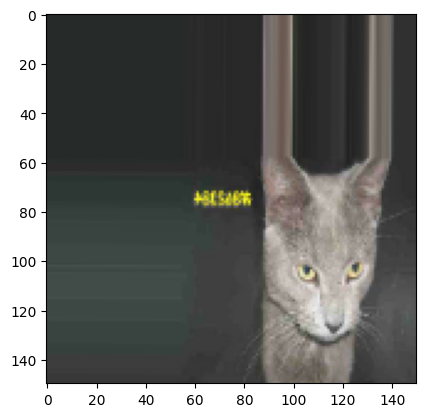

In [28]:
plt.imshow(train_image_gen[0][0][0])

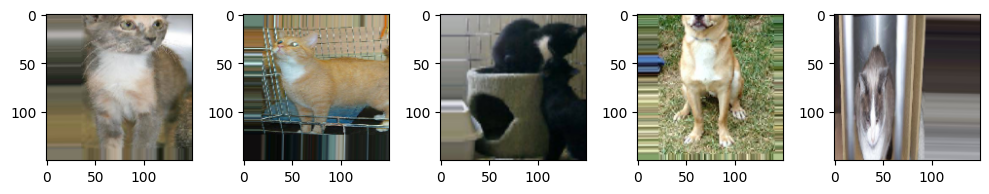

In [29]:
plotImage(train_image_gen[1][0])

# Train model

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [82]:
model = Sequential()

In [83]:

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, strides=2))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(2, strides=2))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(2, strides=2))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(2, strides=2))

model.add(Dropout(.5))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(2))

In [84]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 18, 18, 128)     

In [85]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["accuracy"])

In [80]:
epochs = 100

history = model.fit_generator(train_image_gen,
                    steps_per_epoch=int(train_size/batch_size),
                    epochs=epochs,
                    validation_data=val_image_gen,
                    validation_steps=int(val_size/batch_size))

<ipython-input-80-d4ddce248558>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_image_gen,


Epoch 1/100
31/31 [==============================] - 24s 725ms/step - loss: 0.4573 - accuracy: 0.7774 - val_loss: 0.5113 - val_accuracy: 0.7667
Epoch 2/100
31/31 [==============================] - 23s 755ms/step - loss: 0.4627 - accuracy: 0.7856 - val_loss: 0.4522 - val_accuracy: 0.7896
Epoch 3/100
31/31 [==============================] - 22s 708ms/step - loss: 0.4529 - accuracy: 0.7789 - val_loss: 0.4587 - val_accuracy: 0.7896
Epoch 4/100
31/31 [==============================] - 22s 712ms/step - loss: 0.4488 - accuracy: 0.7877 - val_loss: 0.4870 - val_accuracy: 0.7677
Epoch 5/100
31/31 [==============================] - 22s 703ms/step - loss: 0.4430 - accuracy: 0.7846 - val_loss: 0.4648 - val_accuracy: 0.7990
Epoch 6/100
31/31 [==============================] - 21s 697ms/step - loss: 0.4415 - accuracy: 0.7918 - val_loss: 0.5482 - val_accuracy: 0.7479
Epoch 7/100
31/31 [==============================] - 22s 709ms/step - loss: 0.4287 - accuracy: 0.7872 - val_loss: 0.4693 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Loss')

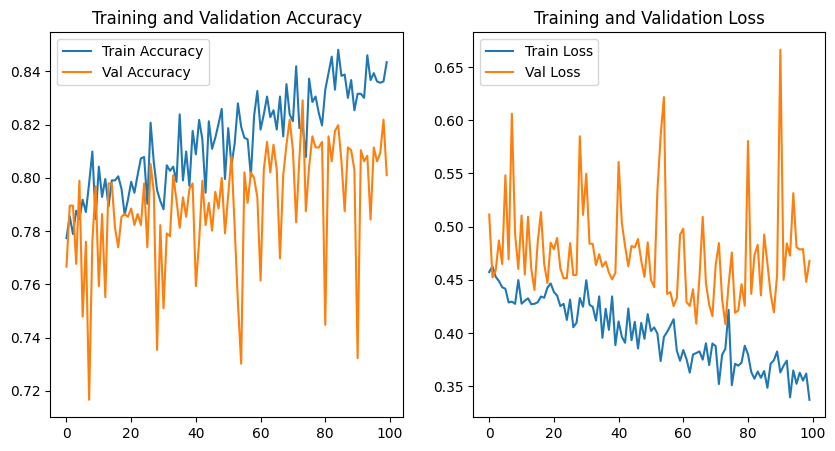

In [81]:
train_accuracy = history.history["accuracy"]
train_loss = history.history["loss"]

val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label="Train Accuracy")
plt.plot(epochs_range, val_accuracy, label="Val Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1 ,2 ,2)
plt.plot(epochs_range, train_loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend()
plt.title("Training and Validation Loss")